In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
#Dataset info
print(f"Train Set size: {len(X_train)}\nTest Set size: {len(X_test)}\nSample image shape:{X_train[0].shape}")

Train Set size: 60000
Test Set size: 10000
Sample image shape:(28, 28)


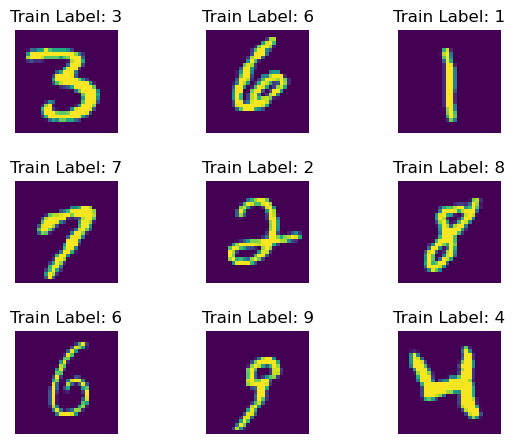

In [10]:
#Image preview
figures = plt.figure()
for i in range (9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[12+i])
    plt.grid(False)
    plt.axis('off')
    plt.title(f"Train Label: {y_train[12+i]}")
plt.tight_layout(pad=2)
plt.savefig("images/SamplePreview.png", bbox_inches="tight")
plt.show()

In [16]:
#Unrolling and normalizing image data
X_train_flattened = X_train.reshape(len(X_train),28*28) / 255
X_test_flattened = X_test.reshape(len(X_test),28*28) / 255

In [17]:
#Size check
print(f"Flattened Train Set shape: {X_train_flattened.shape}\nFlattened Test Set size: {X_test_flattened.shape}")

Flattened Train Set shape: (60000, 784)
Flattened Test Set size: (10000, 784)


In [19]:
#Building Basic NN model
model = Sequential([
    Dense(units=10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8171 - loss: 0.7212
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9147 - loss: 0.3087
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9214 - loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9237 - loss: 0.2718
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2677


In [44]:
y_preds = model.predict(X_test_flattened)
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.9146 - loss: 0.3030


[0.26857277750968933, 0.9241999983787537]

In [45]:
#Storing predictions into array using argmax
y_preds = np.array([np.argmax(i) for i in y_preds])

In [50]:
y_preds

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

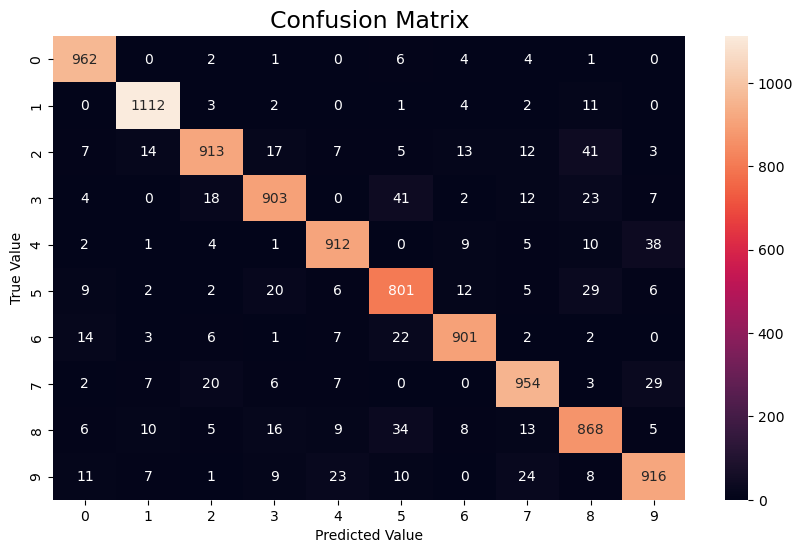

In [65]:
#Confusion Matrix for error analysis
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title("Confusion Matrix", fontsize=17)
plt.tight_layout(pad=6)
plt.savefig("images/Conf_Matrix.png", bbox_inches="tight")
plt.show()

In [122]:
#Checking the fraction of missclassifications for each digit
miss_class_list = []
#cm = cm.numpy()
for i in range(10):
    cols_before_sum = np.sum(cm[i,0:i])
    cols_after_sum = np.sum(cm[i,i:])
    miss_class_list.append( (cols_before_sum + cols_after_sum) / cm[i,i] )


In [123]:
miss_class_list = (np.array(miss_class_list) - 1) * 100
miss_class_list

array([ 1.87110187,  2.06834532, 13.033954  , 11.84939092,  7.6754386 ,
       11.360799  ,  6.32630411,  7.75681342, 12.21198157, 10.15283843])

We see that our NN makes the most mistakes on the digits:
- `2` (13% missclassified)
- `8` (12% missclassified)
- `3` (13% missclassified),

respectively.